#**House Price Prediction using ML Model**

###***1. Importing Dependencies***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics

###***2. Importing Dataset***

In [30]:
# Fetch the dataset
housing = pd.read_csv("/content/HousePrice.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


###***3. Data Cleaning and Preprocessing***

In [ ]:
housing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
housing.isnull().sum()
# No missing values in dataset

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
# Size of dataset
housing.shape

(3000, 9)

In [ ]:
# Printing all the columns present in dataset
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
# Checking for duplication
housing.duplicated().sum()

0

In [ ]:
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


<Axes: xlabel='price', ylabel='area'>

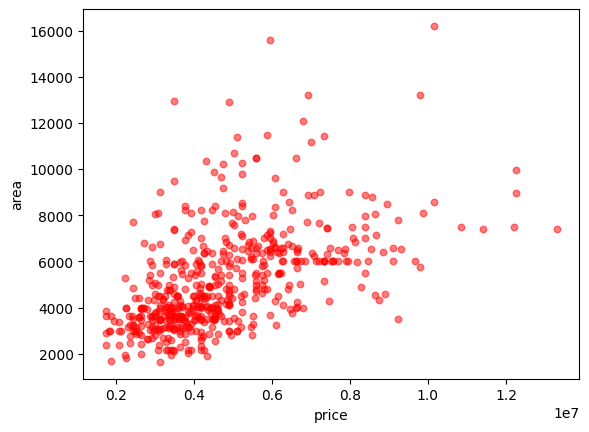

In [ ]:
housing.plot(kind='scatter', x='price', y='area', s = 22, c = 'red', alpha = 0.5)

###*Evaluating Data*

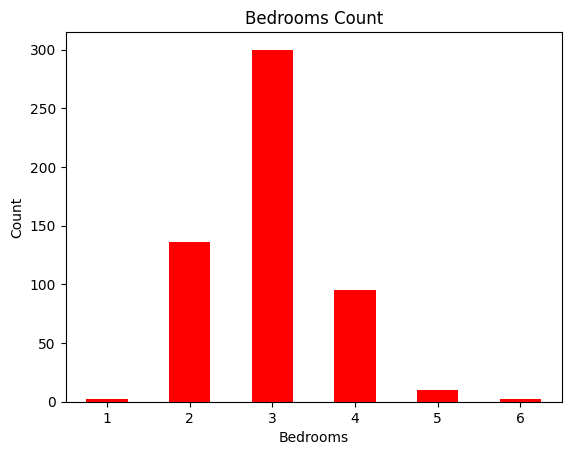

In [ ]:
# Bedroom
bd_room = housing['bedrooms'].value_counts()
bd_room_sort = bd_room.sort_index()
bd_room_sort.plot(kind='bar', color = 'red')
plt.title('Bedrooms Count')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

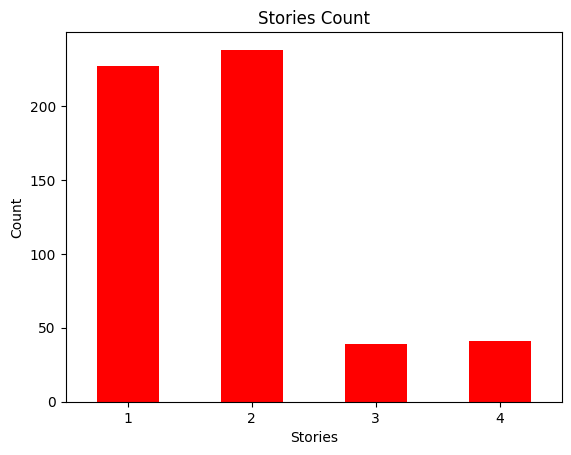

In [ ]:
# Stories
st_count = housing['stories'].value_counts()
st_count_sort = st_count.sort_index()
st_count_sort.plot(kind='bar', color = 'red')
plt.title('Stories Count')
plt.xlabel('Stories')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

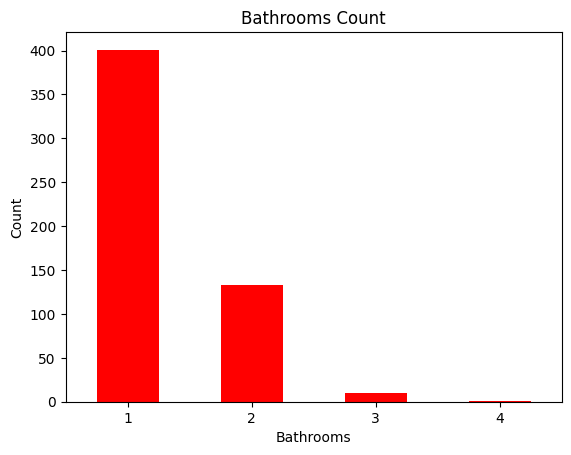

In [ ]:
# Bathroom
bt_room = housing['bathrooms'].value_counts()
bt_room_sort = bt_room.sort_index()
bt_room_sort.plot(kind='bar', color = 'red')
plt.title('Bathrooms Count')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

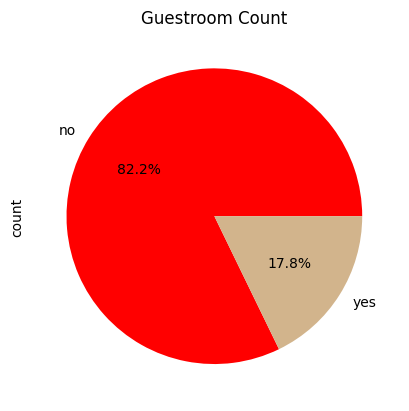

In [ ]:
# Guestroom
gr_room = housing['guestroom'].value_counts()
gr_room_sort = gr_room.sort_index()
colors = ['red', '#D2B48C']
gr_room_sort.plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Guestroom Count')
plt.show()

###*Comparisions*

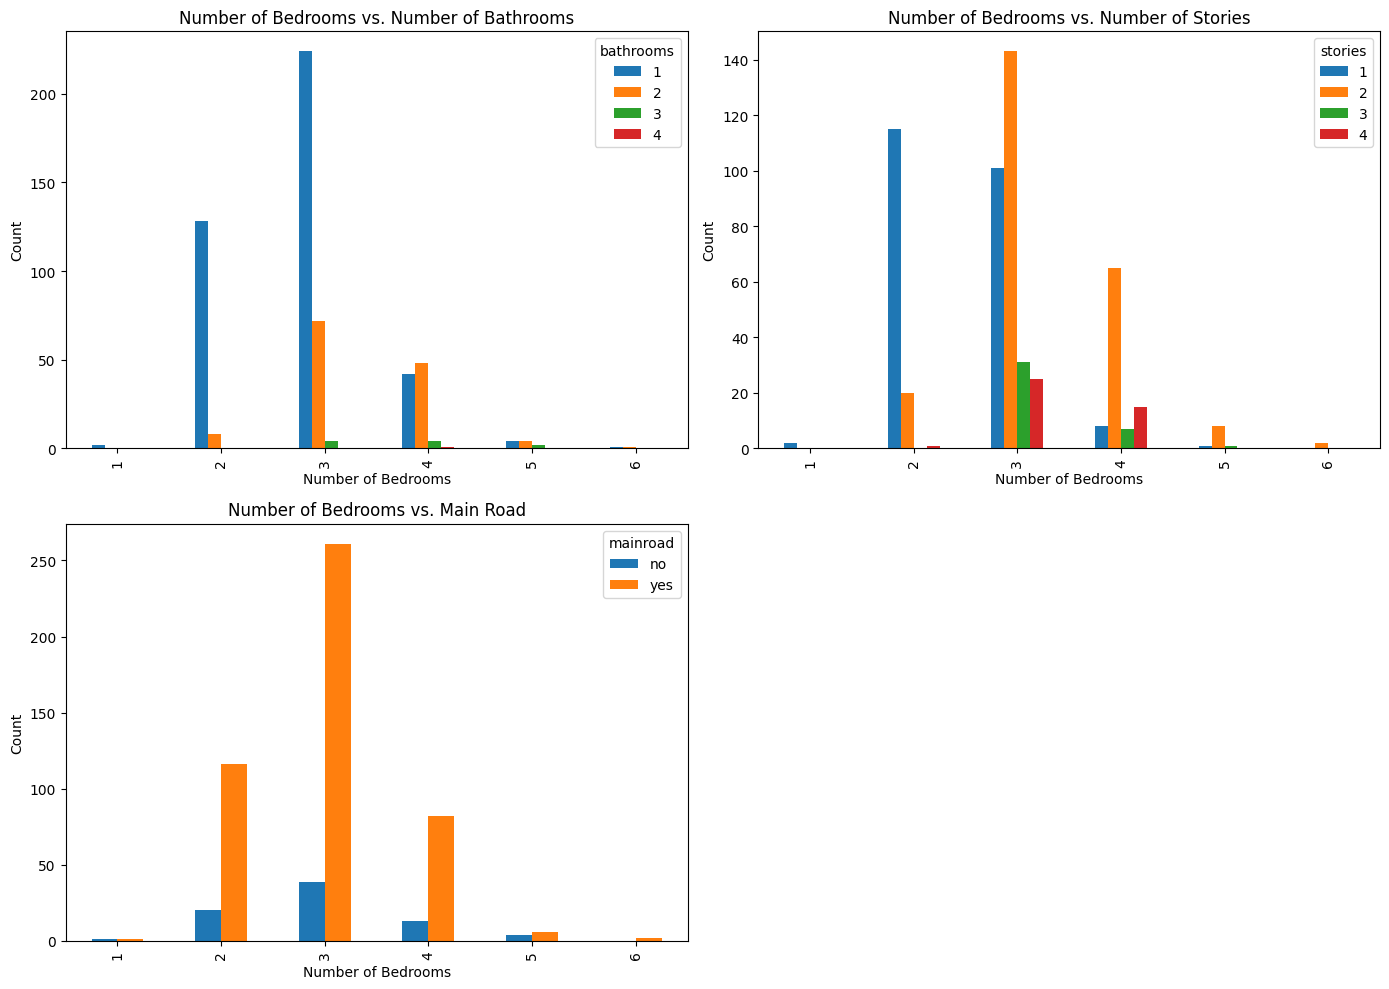

In [46]:
fig, axes = plt.subplots (nrows=2, ncols=2, figsize=(14, 10))

bedrooms_bathrooms = pd.crosstab(housing['bedrooms'], housing['bathrooms'])

bedrooms_bathrooms.plot(kind='bar', ax=axes [0, 0])
axes[0, 0].set_title('Number of Bedrooms vs. Number of Bathrooms')
axes[0, 0].set_xlabel("Number of Bedrooms")
axes[0, 0].set_ylabel('Count')

bedrooms_stories=  pd.crosstab(housing['bedrooms'], housing['stories'])

bedrooms_stories.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Number of Bedrooms vs. Number of Stories')
axes[0, 1].set_xlabel('Number of Bedrooms')
axes[0, 1].set_ylabel('Count')

bedrooms_mainroad = pd.crosstab (housing['bedrooms'], housing['mainroad'])
bedrooms_mainroad.plot(kind='bar', ax = axes [1, 0])
axes[1, 0].set_title('Number of Bedrooms vs. Main Road')
axes[1, 0].set_xlabel('Number of Bedrooms')
axes[1, 0].set_ylabel("Count")

axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

In [4]:
encoder = LabelEncoder()
housing['mainroad'] = encoder.fit_transform(housing['mainroad'])
housing['guestroom'] = encoder.fit_transform(housing['guestroom'])
housing['basement'] = encoder.fit_transform(housing['basement'])

In [5]:
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,0,0,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,0,1,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,0,1,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,1,1,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,0,0,0,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,1,0,0,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,0,0,0,no,no,0,no,furnished


In [7]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

###*Correlation between various features in dataset*

In [19]:
# Convert categorical columns to numerical using one-hot encoding
housing_numeric = pd.get_dummies(housing)

# Calculate correlations on the numerically encoded DataFrame
correlation = housing_numeric.corr()

# Print the correlation matrix
print(correlation)

                                    price      area  bedrooms  bathrooms  \
price                            1.000000  0.535997  0.366494   0.517545   
area                             0.535997  1.000000  0.151858   0.193820   
bedrooms                         0.366494  0.151858  1.000000   0.373930   
bathrooms                        0.517545  0.193820  0.373930   1.000000   
stories                          0.420712  0.083996  0.408564   0.326165   
mainroad                         0.296898  0.288874 -0.012033   0.042398   
guestroom                        0.255517  0.140297  0.080549   0.126469   
basement                         0.187057  0.047417  0.097312   0.102106   
parking                          0.384394  0.352980  0.139270   0.177496   
hotwaterheating_no              -0.093073  0.009229 -0.046049  -0.067159   
hotwaterheating_yes              0.093073 -0.009229  0.046049   0.067159   
airconditioning_no              -0.452954 -0.222393 -0.160603  -0.186915   
aircondition

<Axes: >

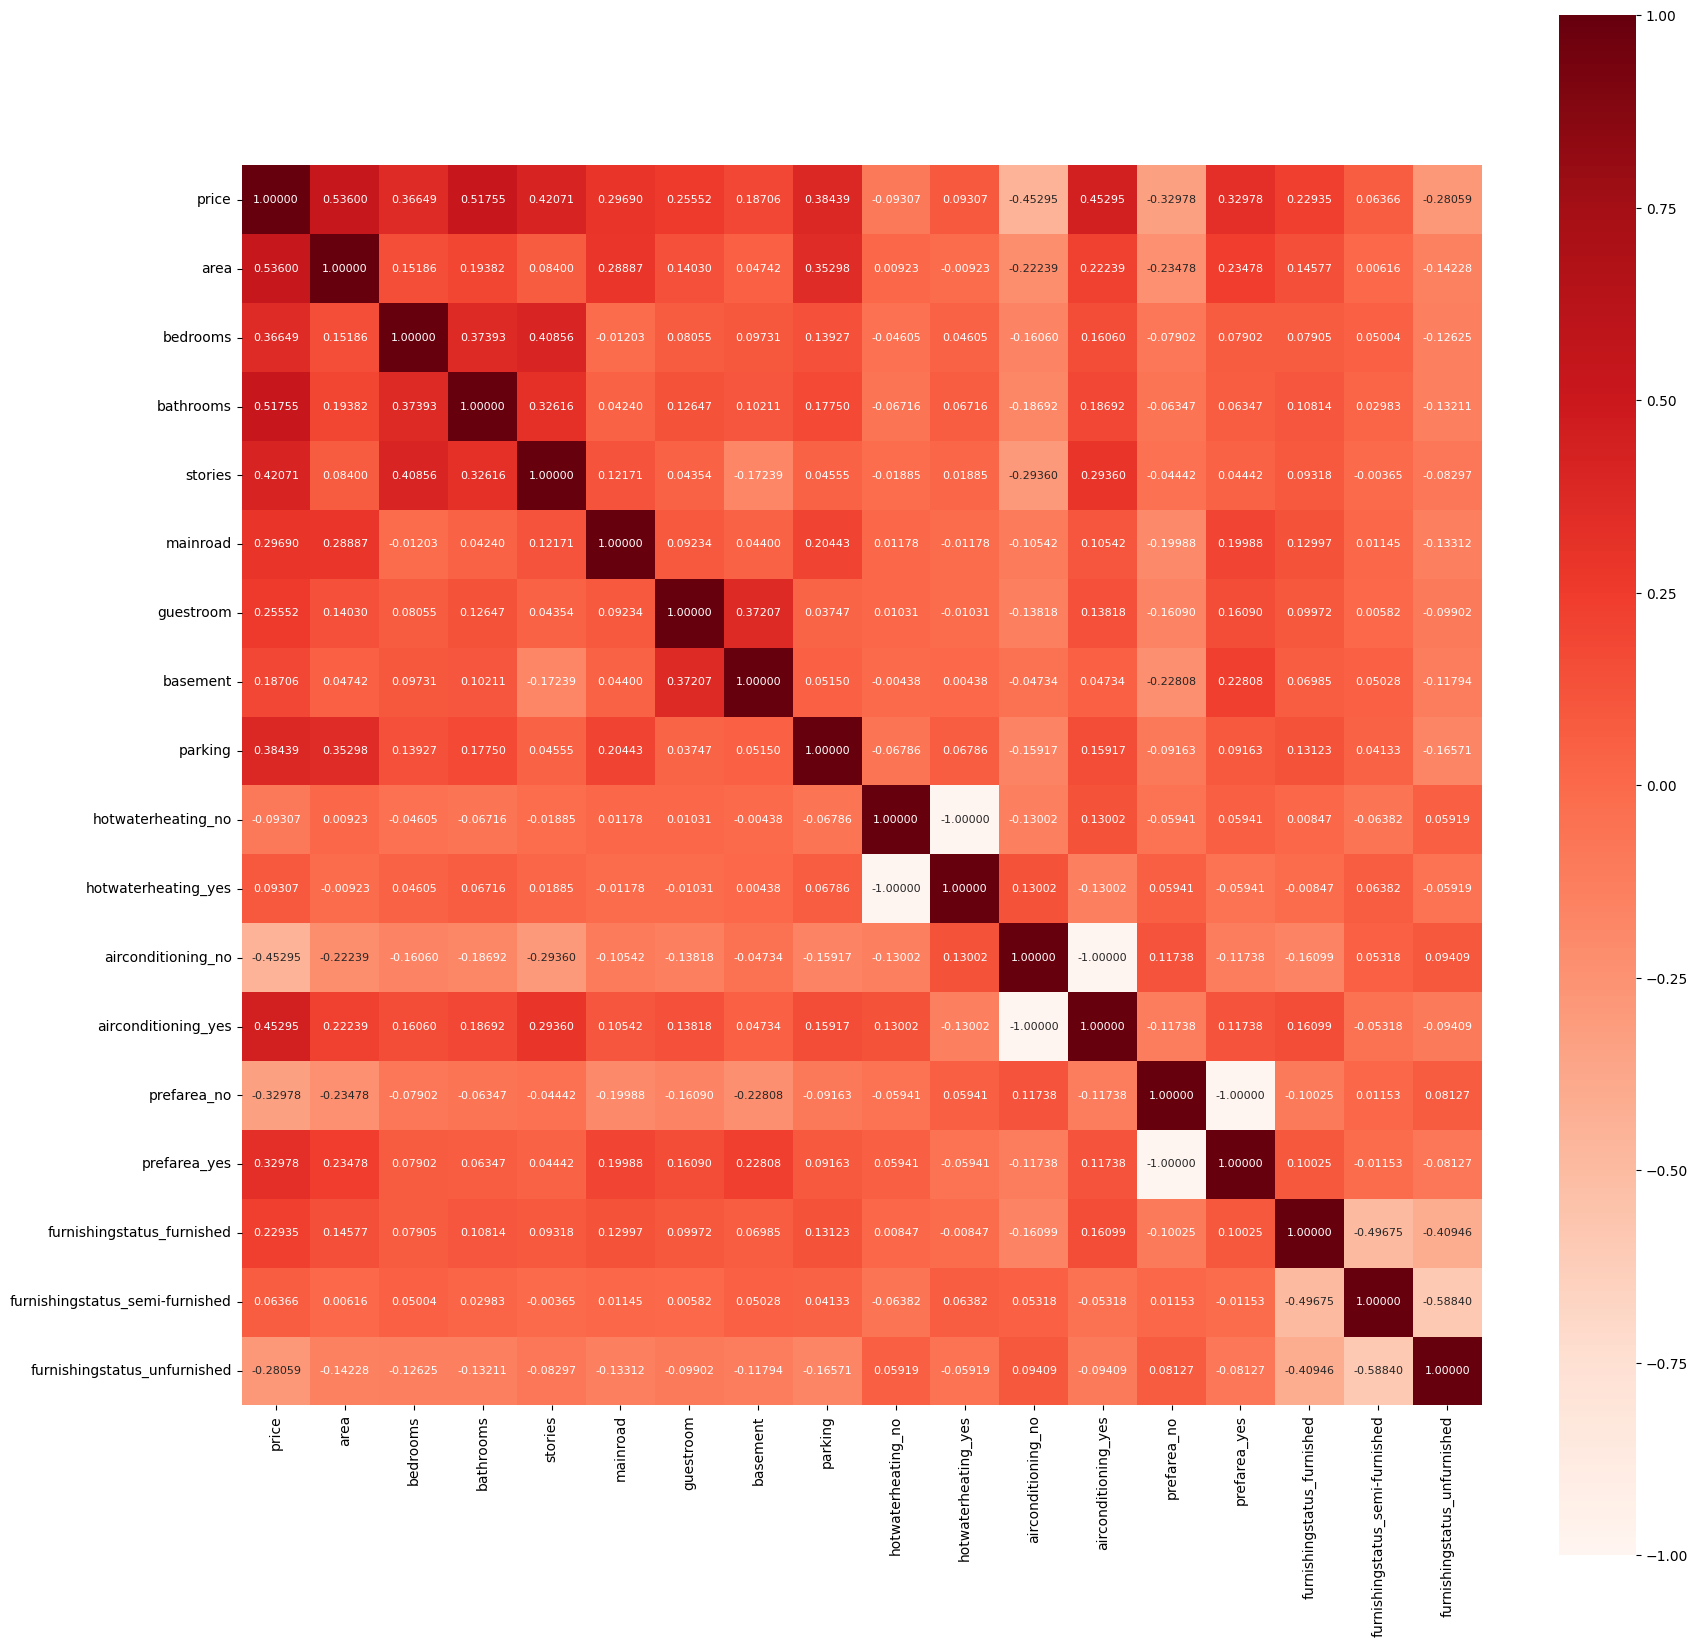

In [49]:
# Constructing headmap to understand the correlation
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(correlation, cbar=True, square=True, fmt='.5f', annot=True ,annot_kws={'size':8}, cmap='Reds')

###***4. Model selection and Training***

###**(i) Training**

In [20]:
X = housing.drop(['price'], axis=1)
Y = housing['price']

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

print(X.dtypes)
object_columns = X.select_dtypes(include=['object']).columns

# Applying one-hot encoding to these columns
X = pd.get_dummies(X, columns=object_columns)
scalar = MinMaxScaler()
X = scalar.fit_transform(X)
Y = scalar.fit_transform(Y.values.reshape(-1,1))

area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad             int64
guestroom            int64
basement             int64
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


###*Splitting the data into Training and Test data*

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=101) # Use the existing Y variable that contains the target values


###**(ii) Selecting Model**

###*Linear Regression*

In [32]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

###***Predictions***

In [36]:
predictions = lm.predict(X_test)

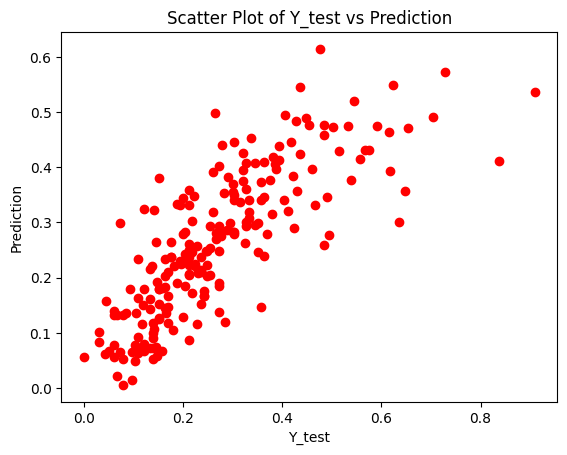

In [37]:
plt.scatter(Y_test, predictions, color='red')
plt.xlabel('Y_test')
plt.ylabel('Prediction')
plt.title('Scatter Plot of Y_test vs Prediction')
plt.show()

*In the above scatter plot, we see data is in line shape, which means our model has done good predictions.*

###***Evaluation Matrices***

In [42]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 0.06913768101954819
MSE: 0.009246199838996784
RMSE: 0.09615716218252691


In [43]:
lm.score(X_test, Y_test)

0.6267209023959793